In [ ]:
#This script describes the workflow of data analysis and visualization used in Fig.2
###by Haikuo Li @ Humphreys Lab

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3          
sc.logging.print_header()
from matplotlib import rcParams
import matplotlib.font_manager
rcParams['font.sans-serif']=['Arial']
sc.settings.set_figure_params(dpi=100, facecolor='white',fontsize=12)
from matplotlib import rcParams
rcParams['axes.grid'] = False
adata=sc.read('read_file_name.h5ad')

scanpy==1.7.2 anndata==0.7.6 umap==0.4.6 numpy==1.20.1 scipy==1.6.2 pandas==1.1.4 scikit-learn==0.22 statsmodels==0.12.2 python-igraph==0.9.4


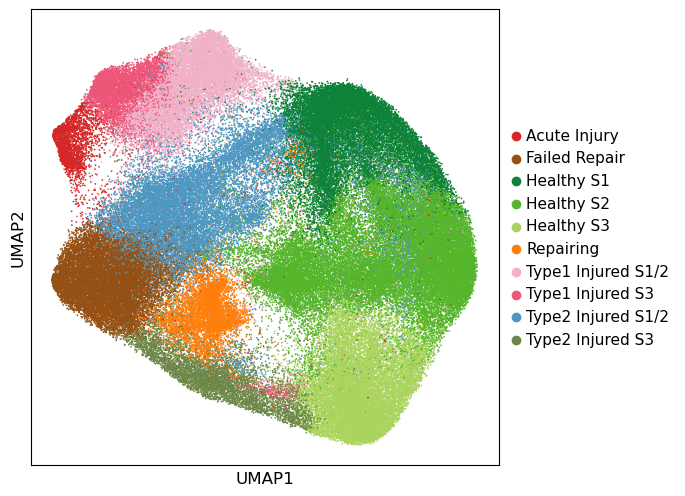

In [2]:
rcParams['figure.figsize'] = 6,6
sc.pl.umap(adata, color='PT_0503',size=6,title='')
#figure 2a

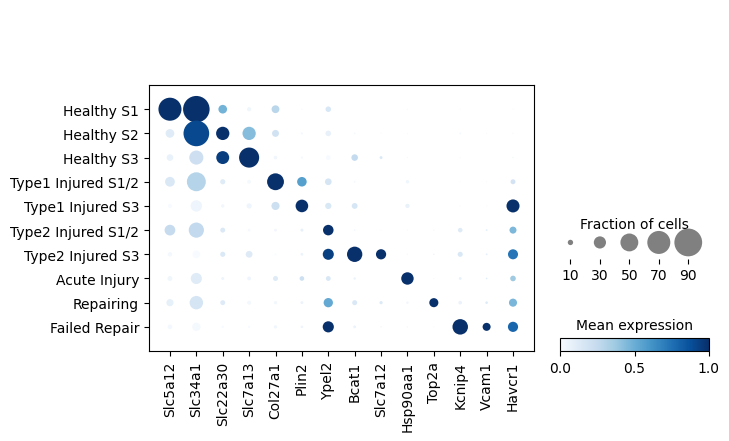

In [3]:
cell_order=['Healthy S1','Healthy S2','Healthy S3','Type1 Injured S1/2','Type1 Injured S3',
            'Type2 Injured S1/2','Type2 Injured S3','Acute Injury','Repairing','Failed Repair']

marker_genes=['Slc5a12','Slc34a1','Slc22a30','Slc7a13','Col27a1','Plin2',
             'Ypel2','Bcat1','Slc7a12',
             'Hsp90aa1','Top2a','Kcnip4','Vcam1','Havcr1']

sc.pl.DotPlot(adata, marker_genes, groupby='PT_0503',
             categories_order=cell_order,standard_scale='var')\
.style(cmap="Blues",largest_dot=400,dot_edge_lw=0)\
.legend(width=2,colorbar_title='Mean expression',size_title='Fraction of cells').savefig('figures/f2_dotplot.png')

#figure 2b

In [3]:
adata0=sc.read('GRN_PT.h5ad',compression='gzip')
import dorothea
##see Methods for how we performed TF activity prediction analysis with dorothea

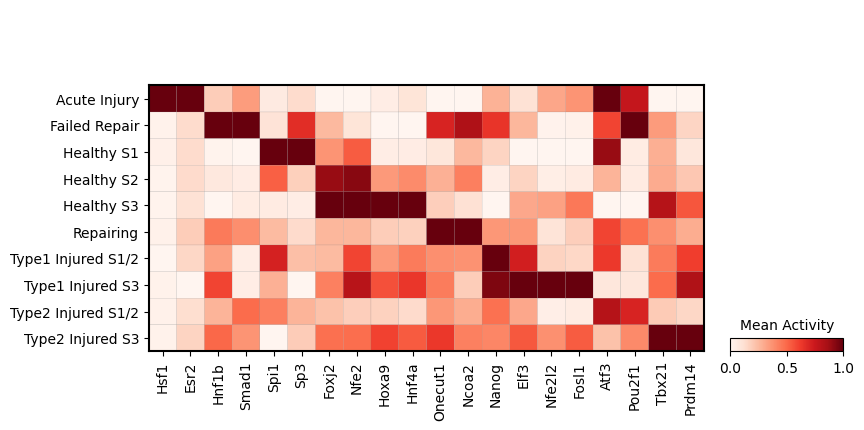

In [4]:
tfs_gene=['Hsf1',
 'Esr2',
 'Hnf1b',
 'Smad1',
 'Spi1',
 'Sp3',
 'Foxj2',
 'Nfe2',
 'Hoxa9',
 'Hnf4a',
 'Onecut1',
 'Ncoa2',
 'Nanog', 'Elf3',
 'Nfe2l2',
 'Fosl1',
 'Atf3',
 'Pou2f1',
 'Tbx21',
 'Prdm14']
sc.pl.matrixplot(dorothea.extract(adata0), tfs_gene, 'PT_0503',  cmap='Reds',standard_scale='var',colorbar_title='Mean Activity',
                 save='f2_GRN.png')

##figure 2c

In [ ]:
##see Methods for how we performed single-cell pathway activity analysis with progeny
import pandas as pd
import numpy as np
import scanpy as sc
import progeny
import matplotlib.pyplot as plt

model = progeny.load_model(
    organism='Mouse', # If working with mouse, set to Mouse
    top=2000          # For sc we recommend ~1k target genes since there are dropouts
)

progeny.run(adata,        # Data to use
            model,        # PROGENy network
            center=True,  # Center gene expression by mean per cell
            num_perm=100, # Simulate m random activities
            norm=True,    # Normalize by number of edges to correct for large regulons
            scale=True,   # Scale values per feature so that values can be compared across cells
            use_raw=False, # Use raw adata, where we have the lognorm gene expression
            min_size=5    # Pathways with less than 5 targets will be ignored
           )

pw_adata = progeny.extract(adata)

sc.pl.umap(pw_adata, color='EGFR', vmin=-0.8, vmax=4, cmap='coolwarm',size=6,title='EGFR Pathway Activity')
sc.pl.umap(pw_adata, color='NFkB', vmin=-1, vmax=5, cmap='coolwarm',size=6,title='NFkB Pathway Activity')
sc.pl.umap(pw_adata, color='TNFa', vmin=-1, vmax=4.5, cmap='coolwarm',size=6,title='TNFa Pathway Activity')

##Figure 2d

In [ ]:
#Next we describe the workflow of CellRank, generating Figure 2g

In [ ]:
import matplotlib.pyplot as plt
#import scvelo as scv
import scanpy as sc
import cellrank as cr

# import CellRank kernels and estimators
from cellrank.external.kernels import WOTKernel
from cellrank.tl.kernels import ConnectivityKernel
from cellrank.tl.estimators import GPCCA

# set verbosity levels
cr.settings.verbosity = 2
sc.settings.verbosity = 3

sc.settings.set_figure_params(dpi=100, facecolor='white',fontsize=12)

adata=sc.read('anndata_PT_subset_IRI.h5ad')##see Methods

wk = WOTKernel(adata, time_key="day")
wk.compute_initial_growth_rates(organism="mouse", key_added="growth_rate_init")
sc.pl.umap(adata, color="growth_rate_init")
wk.compute_transition_matrix(
    growth_iters=3, growth_rate_key="growth_rate_init", last_time_point="connectivities"
)
wk.plot_random_walks(
    n_sims=300,
    max_iter=200,
    start_ixs={"day": 0},
    basis="umap",
    c="day",
    legend_loc="none",
    linealpha=0.5,
    dpi=150,
)

Computing flow from `Type1 Injured S3` into `4` cluster(s) in `4` time points
Plotting flow from `Type1 Injured S3` into `2` cluster(s) in `4` time points


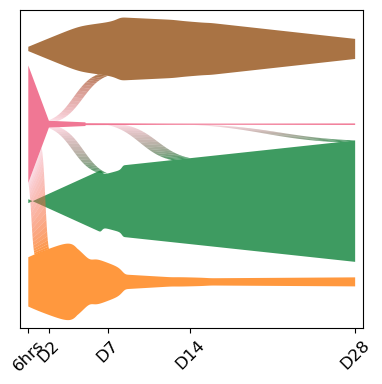

In [184]:
ax = wk.plot_single_flow(
    cluster_key="PT_0503",
    time_key="day",
    cluster="Type1 Injured S3",
    min_flow=0.2,
    xticks_step_size=0.25,
    show=False,
    dpi=100,time_points=[0.25,2.0,7.0,14.0,28.0],
    clusters=["Healthy S3", "Failed repair",'Repairing','Type1 Injured S3','Acute Injury']
)

# prettify the plot a bit, rotate x-axis tick labels
ax.get_legend().remove()
locs, labels = plt.xticks()
ax.set_xticks(locs)
ax.grid(False)
ax.set_xticklabels(['6hrs','D2','D7','D14','D28'], rotation=45)
plt.ylabel("")
plt.xlabel("")
plt.title('')
plt.tight_layout()

plt.savefig('figures/f2_cellrank_IRI.png')

In [ ]:
adata=sc.read('anndata_PT_subset_UUO.h5ad')
wk = WOTKernel(adata, time_key="day")
wk.compute_initial_growth_rates(organism="mouse", key_added="growth_rate_init")
sc.pl.umap(adata, color="growth_rate_init")
wk.compute_transition_matrix(
    growth_iters=3, growth_rate_key="growth_rate_init", last_time_point="connectivities"
)
wk.plot_random_walks(
    n_sims=300,
    max_iter=200,
    start_ixs={"day": 0},
    basis="umap",
    c="day",
    legend_loc="none",
    linealpha=0.5,
    dpi=100,
)

Computing flow from `Type2 Injured S3` into `4` cluster(s) in `5` time points
Plotting flow from `Type2 Injured S3` into `2` cluster(s) in `5` time points


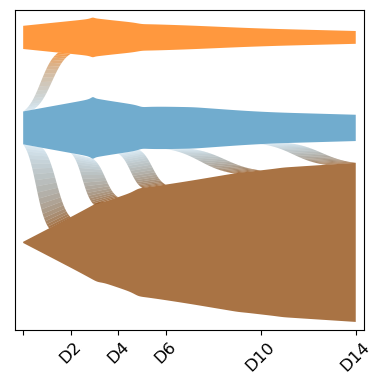

In [191]:
ax = wk.plot_single_flow(
    cluster_key="PT_0503",
    time_key="day",
    cluster="Type2 Injured S3",
    min_flow=0.2,
    xticks_step_size=0.25,
    show=False,
    dpi=100,
    clusters=["Healthy S3", "Failed repair",'Repairing','Type2 Injured S3','Acute Injury']
)

ax.get_legend().remove()
locs, labels = plt.xticks()
ax.set_xticks(locs)
ax.grid(False)
ax.set_xticklabels(['','D2','D4','D6','D10','D14'], rotation=45)
plt.ylabel("")
plt.xlabel("")
plt.title("")
plt.tight_layout()

plt.savefig('figures/f2_cellrank_UUO.png')